In [1]:
import pandas as pd, seaborn as sns, warnings
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC

warnings.filterwarnings('ignore')

In [2]:
sns.set(style = 'whitegrid')
plt.rc('figure', autolayout = True)
plt.rc('axes', labelweight = 'bold', labelsize = 'large', titleweight = 'bold', titlesize = 18, titlepad = 10)
plt.rc('animation', html = 'html5')

In [3]:
def classify_health_impact(score):
    if score >= 80:
        return 0  
    elif score >= 60:
        return 1  
    elif score >= 40:
        return 2  
    elif score >= 20:
        return 3  
    else:
        return 4  

In [4]:
air = pd.read_csv('air_quality_health_impact_data.csv')
air_cleaned = air.drop(columns = ['RecordID'])
for col in ['AQI', 'PM10', 'PM2_5', 'NO2', 'SO2', 'O3']:
    Q1 = air_cleaned[col].quantile(0.25)
    Q3 = air_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    air_cleaned[col] = air_cleaned[col].apply(lambda x: min(max(x, lower_bound), upper_bound))
air_cleaned['HealthImpactClass'] = air_cleaned['HealthImpactScore'].apply(classify_health_impact)

In [5]:
y = air_cleaned['HealthImpactClass']
x = air_cleaned.drop(['HealthImpactClass', 'HealthImpactScore'], axis = 1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 52)

In [6]:
svc1 = LinearSVC()
svc1.fit(xtrain, ytrain)

LinearSVC()

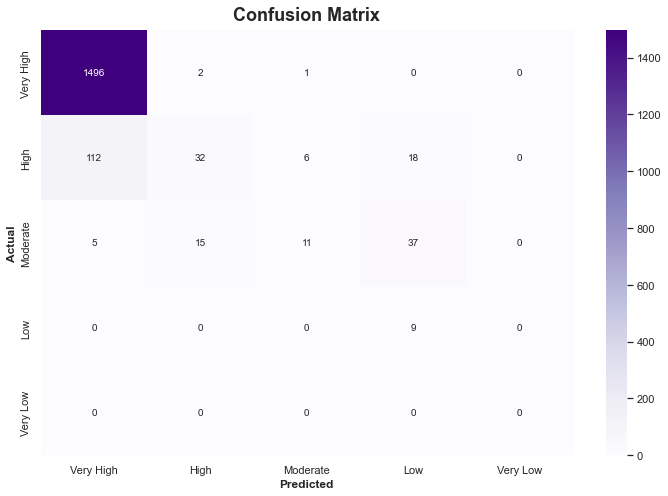

In [7]:
ypred = svc1.predict(xtest)
plt.figure(figsize = (10, 7))
class_labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
sns.heatmap(confusion_matrix(ytest, ypred, labels = [0, 1, 2, 3, 4]), annot = True, cmap = 'Purples', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
print(f"Accuracy: {accuracy_score(ytest, ypred):.2f}")
print("\n")
print(classification_report(ytest, ypred))

Accuracy: 0.89


              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1499
           1       0.65      0.19      0.29       168
           2       0.61      0.16      0.26        68
           3       0.14      1.00      0.25         9

    accuracy                           0.89      1744
   macro avg       0.58      0.59      0.44      1744
weighted avg       0.88      0.89      0.87      1744



In [9]:
svc2 = SVC(kernel = 'rbf')
svc2.fit(xtrain, ytrain)

SVC()

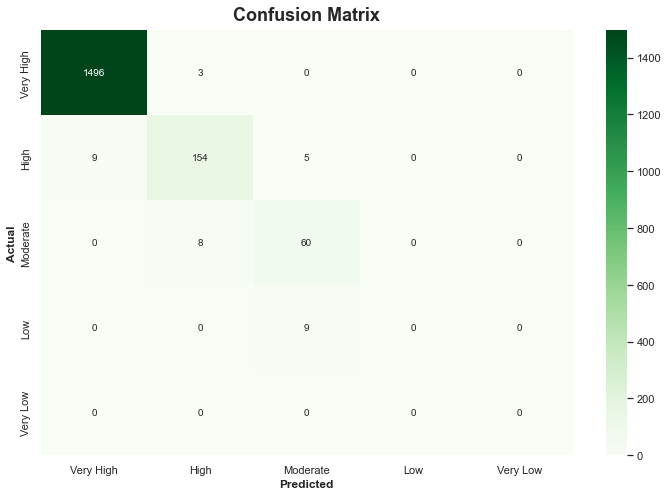

In [10]:
ypred = svc2.predict(xtest)
plt.figure(figsize = (10, 7))
class_labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
sns.heatmap(confusion_matrix(ytest, ypred, labels = [0, 1, 2, 3, 4]), annot = True, cmap = 'Greens', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
print(f"Accuracy: {accuracy_score(ytest, ypred):.2f}")
print("\n")
print(classification_report(ytest, ypred))

Accuracy: 0.98


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1499
           1       0.93      0.92      0.92       168
           2       0.81      0.88      0.85        68
           3       0.00      0.00      0.00         9

    accuracy                           0.98      1744
   macro avg       0.68      0.70      0.69      1744
weighted avg       0.98      0.98      0.98      1744



In [12]:
svc3 = SVC(kernel = 'poly', degree = 3, coef0 = 2)
svc3.fit(xtrain, ytrain)

SVC(coef0=2, kernel='poly')

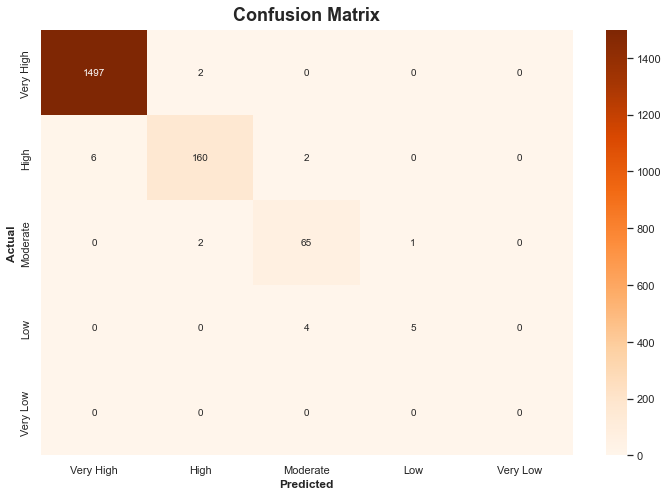

In [13]:
ypred = svc3.predict(xtest)
plt.figure(figsize = (10, 7))
class_labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
sns.heatmap(confusion_matrix(ytest, ypred, labels = [0, 1, 2, 3, 4]), annot = True, cmap = 'Oranges', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
print(f"Accuracy: {accuracy_score(ytest, ypred):.2f}")
print("\n")
print(classification_report(ytest, ypred))

Accuracy: 0.99


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1499
           1       0.98      0.95      0.96       168
           2       0.92      0.96      0.94        68
           3       0.83      0.56      0.67         9

    accuracy                           0.99      1744
   macro avg       0.93      0.87      0.89      1744
weighted avg       0.99      0.99      0.99      1744



In [15]:
svc4 = SVC(kernel = 'sigmoid')
svc4.fit(xtrain, ytrain)

SVC(kernel='sigmoid')

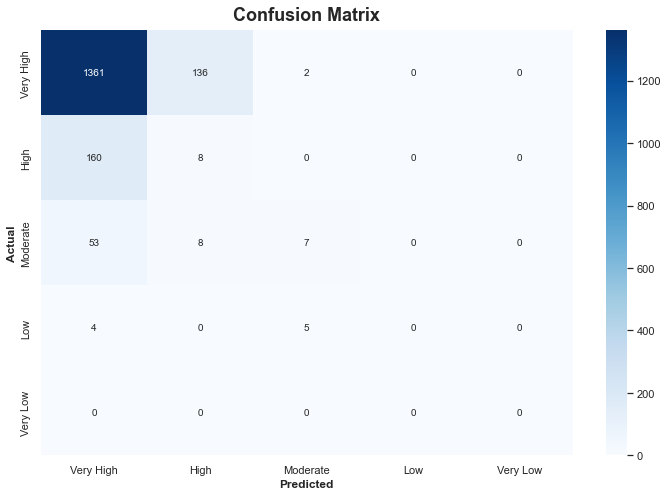

In [16]:
ypred = svc4.predict(xtest)
plt.figure(figsize = (10, 7))
class_labels = ['Very High', 'High', 'Moderate', 'Low', 'Very Low']
sns.heatmap(confusion_matrix(ytest, ypred, labels = [0, 1, 2, 3, 4]), annot = True, cmap = 'Blues', fmt = 'd', xticklabels = class_labels, yticklabels = class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
print(f"Accuracy: {accuracy_score(ytest, ypred):.2f}")
print("\n")
print(classification_report(ytest, ypred))

Accuracy: 0.79


              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1499
           1       0.05      0.05      0.05       168
           2       0.50      0.10      0.17        68
           3       0.00      0.00      0.00         9

    accuracy                           0.79      1744
   macro avg       0.35      0.26      0.28      1744
weighted avg       0.77      0.79      0.77      1744

